## import package

In [44]:
# plot excel data xlsx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## import data and preview

In [45]:

filename = '0804_CV_50mM'
# Load the Excel file in current folder's subfolder 'data'

df = pd.read_excel(f'./data/{filename}.xlsx')
df.head()


,Potential applied (V),Time (s),WE(1).Current (A),WE(1).Potential (V),Scan,Index,Q+,Q-,Overload
0,0.010071,6.415548,-0.000044,0.010977,1.0,1.0,0.000718,-0.000991,NaN
1,0.020142,6.516256,-0.000043,0.021057,1.0,2.0,0.000718,-0.000991,NaN
2,0.030212,6.616964,-0.000043,0.031104,1.0,3.0,0.000718,-0.000991,NaN
3,0.040283,6.717672,-0.000042,0.041202,1.0,4.0,0.000718,-0.000991,NaN
4,0.050354,6.818380,-0.000041,0.051178,1.0,5.0,0.000718,-0.000991,NaN


## line plot templet

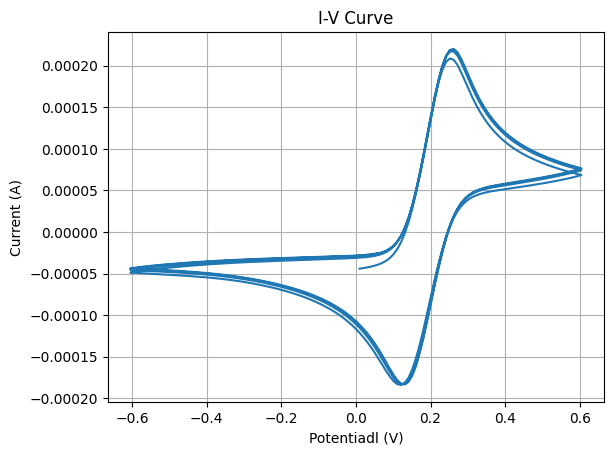

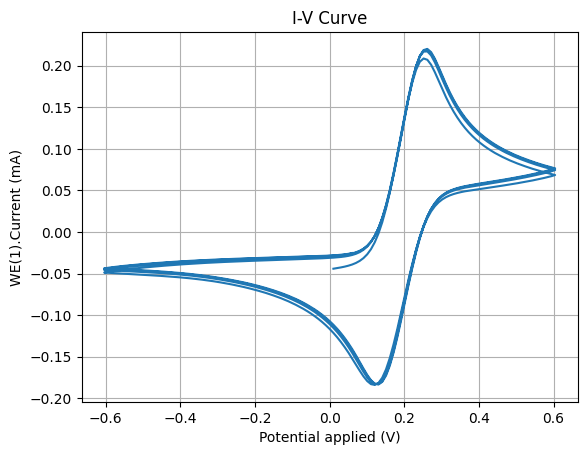

In [46]:
# draw line plot x=potential, y=current
x = 'Potential applied (V)'
y = 'WE(1).Current (A)'
plt.plot(df[x], df[y])
plt.xlabel('Potentiadl (V)')
plt.ylabel('Current (A)')
plt.title('I-V Curve')
plt.grid()
plt.show()

# show current from A to mA but and dont change original data
df['WE(1).Current (mA)'] = df['WE(1).Current (A)'] * 1000

x = 'Potential applied (V)'
y = 'WE(1).Current (mA)'
plt.plot(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title('I-V Curve')
plt.grid()
plt.show()


## select data

In [60]:

# select scan 3 and the first item of scan 4

df_scan3 = df[df['Scan'] == 3]
next_index = df_scan3.index + 1
df_scan3_plus1 = df.loc[df_scan3.index.union(next_index), :]

df_scan3_plus1
df_scan3.index.union(next_index)

Index([480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       ...
       711, 712, 713, 714, 715, 716, 717, 718, 719, 720],
      dtype='int64', length=241)

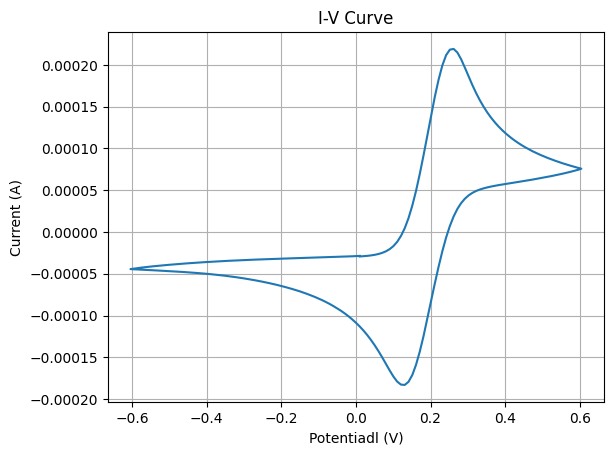

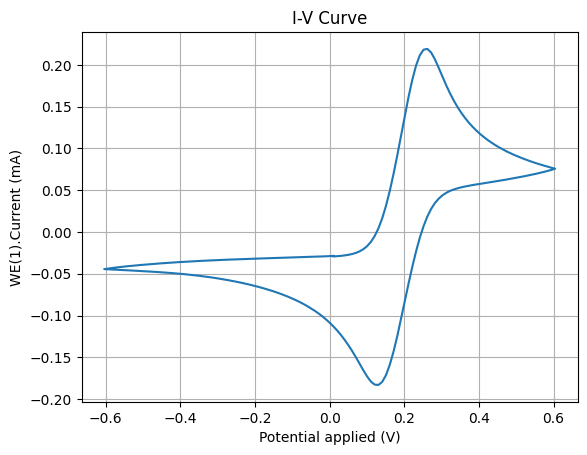

In [61]:
df = df_scan3_plus1
x = 'Potential applied (V)'
y = 'WE(1).Current (A)'
plt.plot(df[x], df[y])
plt.xlabel('Potentiadl (V)')
plt.ylabel('Current (A)')
plt.title('I-V Curve')
plt.grid()
plt.show()

# show current from A to mA but and dont change original data
df['WE(1).Current (mA)'] = df['WE(1).Current (A)'] * 1000

x = 'Potential applied (V)'
y = 'WE(1).Current (mA)'
plt.plot(df[x], df[y])
plt.xlabel(x)
plt.ylabel(y)
plt.title('I-V Curve')
plt.grid()
plt.show()

## multiple line plot

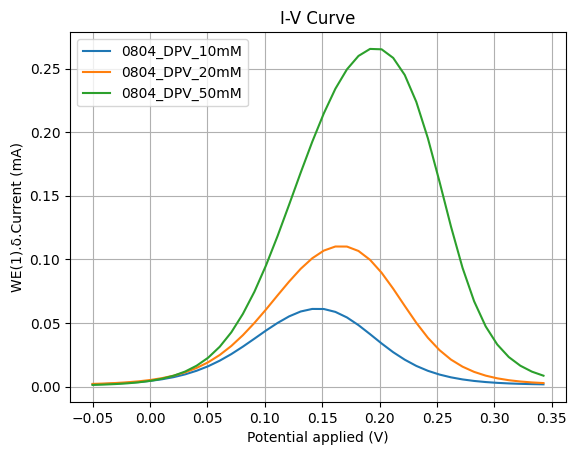

In [20]:
# read multiple xlsx, draw line plot on same graph
filenames = [
    '0804_DPV_10mM', '0804_DPV_20mM','0804_DPV_50mM']

for filename in filenames:
    df = pd.read_excel(f'./data/{filename}.xlsx')
    
    df['WE(1).δ.Current (mA)'] = df['WE(1).δ.Current (A)'] * 1000
    x = 'Potential applied (V)'
    y = 'WE(1).δ.Current (mA)'
    plt.plot(df[x], df[y], label=filename)
plt.xlabel(x)
plt.ylabel(y)
plt.title('I-V Curve')
plt.grid()
plt.legend()
plt.show()

In [65]:
import glob
import os

# ==========================
# 1. 讀取資料夾內所有 Excel
# ==========================
file_paths = glob.glob("./data/cTnI_DPV/*.xlsx")   # 可以改成 *.csv
dfs = []
names = []
for path in file_paths:
    df = pd.read_excel(path)
    # 確保欄位名稱正確
    # 記錄來源檔名 (去掉路徑和副檔名)
    names.append(os.path.splitext(os.path.basename(path))[0])
    dfs.append(df)

print(f"共讀取 {len(dfs)} 個檔案")
names

共讀取 9 個檔案


['0819_10pg_cTnI_DPV',
 '0819_bare_cTnI_DPV',
 '0819_MCH_cTnI_DPV',
 '0819_1pg_cTnI_DPV',
 '0819_0.1uM_apt_cTnI_DPV',
 '0819_10000pg_cTnI_DPV',
 '0819_100pg_cTnI_DPV',
 '0819_100000pg_cTnI_DPV',
 '0819_1000pg_cTnI_DPV']

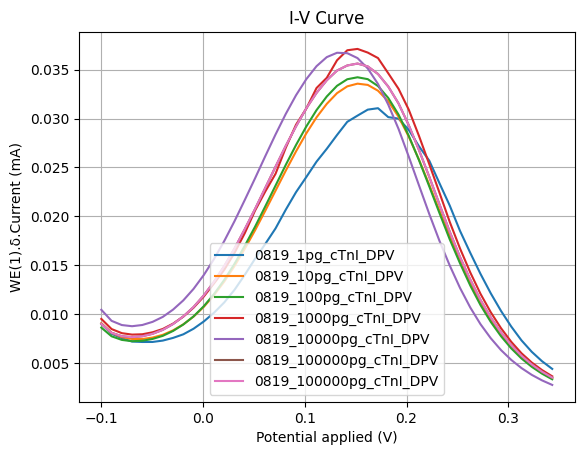

In [68]:
# read multiple xlsx, draw line plot on same graph
filenames = ['0819_1pg_cTnI_DPV', '0819_10pg_cTnI_DPV', '0819_100pg_cTnI_DPV',
             '0819_1000pg_cTnI_DPV', '0819_10000pg_cTnI_DPV', '0819_100000pg_cTnI_DPV', 
             '0819_100000pg_cTnI_DPV']

for filename in filenames:
    df = pd.read_excel(f'./data/cTnI_DPV/{filename}.xlsx')
    
    df['WE(1).δ.Current (mA)'] = df['WE(1).δ.Current (A)'] * 1000
    x = 'Potential applied (V)'
    y = 'WE(1).δ.Current (mA)'
    plt.plot(df[x], df[y], label=filename)

# adjust legend position to left top


plt.xlabel(x)
plt.ylabel(y)
plt.title('I-V Curve')
plt.grid()
plt.legend()
plt.show()